In [1]:
import tools as tools
import classifier as classify
import fitting as fit
import os
import numpy as np

import BeatnotePipeline
from BeatnotePipeline import BeatnotePipeline

In [3]:
USBdirectory = '/Volumes/POCKETLAB/LSI/data/'
directory = 'data/'
folder = '2024-03-13/data/analyse/'
folder = 'test'
OSA_folder = '2024-03-13/OSA/'
target_dir = 'output/'+'2024-03-13/'

beat = BeatnotePipeline(directory, folder, target_dir)

In [4]:
beat.load_data(type='csv')

['combined_data_lock_in_test.csv']
2426  frames in dataset  combined_data_lock_in_test.csv


In [5]:
data_dictionary = beat.data_dictionary
print(beat.data_dictionary.keys())

dict_keys(['ombined_data_lock_in_test'])


Select file from dictionary to analyse using the appropriate filename as a string

In [8]:
filename = 'SBs_vs_lambd_corr'
filename = 'ombined_data_lock_in_test'
datafile = data_dictionary[filename]

Background correction if file available

In [ ]:
background_filename = ''
data_filename = ''

beat.correct_file(self, background_filename, data_filename)
print(beat.data_dictionary.keys())

datafile = data_dictionary[data_filename+'_corr']

Plot index frame from selected datafile

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


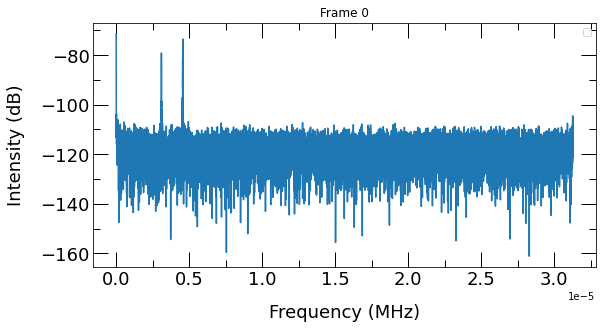

In [9]:
beat.plot_data(datafile, index = 0)

## Run multi-Lorentzian fitting cycle on data to extract beatnote characteristics
## Define cycle fit parameters

In [15]:
#Select range of frames to fit
n_frames = [0, 1]
#Select frequency domain to fit
crop = [0, -1]
#Take moving average of data for fitting - default = 1 for NO averaging
n_avg = 10
#Define peak finder parameters - Adjust for optimal peak detection
width = 10
height = -110
distance = 10

## Run cycle fit

Fitting frame number  0
2  peak maxima found at t =  [3.1, 4.56]


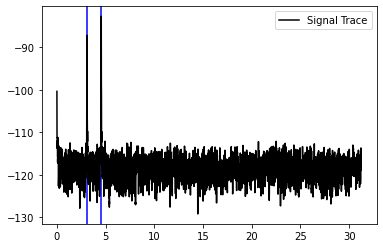

()
Fitting  1 out of  2 peaks
Domain to fit:  1429 1810
191
381
3.1

Running fit!

Fit done!

Fitted parameters =  [-5.90524233e+10  3.10000000e+00  8.00032722e+13  5.90524232e+10]

Error of parameters = [0.         0.         0.         0.33464006]
Guess =  [-87.2, 3.1, 50000.0, -126.16]
Optimsed Parameters =  [-5.90524233e+10  3.10000000e+00  8.00032722e+13  5.90524232e+10]
OUTPUT [-5.90524233e+10  3.10000000e+00  8.00032722e+13  5.90524232e+10]
Fitting  2 out of  2 peaks
Domain to fit:  2195 2576
191
381
4.56

Running fit!

Fit done!

Fitted parameters =  [-1.05551987e+11  4.56000000e+00  8.77360253e+13  1.05551987e+11]

Error of parameters = [0.        0.        0.        0.3575354]
Guess =  [-82.7, 4.56, 50000.0, -125.05]
Optimsed Parameters =  [-1.05551987e+11  4.56000000e+00  8.77360253e+13  1.05551987e+11]
OUTPUT [-1.05551987e+11  4.56000000e+00  8.77360253e+13  1.05551987e+11]
Guess:  (-59052423318.55125, 3.1, 80003272206577.45, 59052423201.66436, -105551986722.31203, 4.56, 87

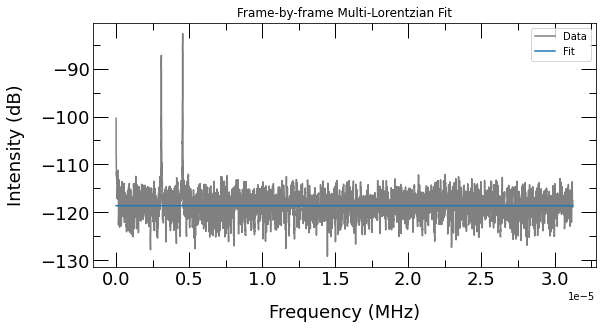

Fit parameters [a, x0, gam, off]:  [-5.90384318e+10  3.10000000e+00  8.00032722e+13  5.90524232e+10
 -9.87679390e+13  4.56000000e+00  8.77360253e+13  9.87679250e+13]


In [16]:
#Set plot = False to speed up cycle fit
plot = True

beat.process_data(datafile, crop, n_avg, width, height, distance, n_frames, plot)


Fit parameters automatically saved as binary [frames]_fit_parameters.npy file in output directory

Combine all fit parameters for given dataset in single fit_parameters.npy file

In [ ]:
beat.combine_saved_parameters()

Load fit parameters

In [4]:
fit_params_list = beat.load_fit_parameters()

Fit parameters available to load:  ['[0, 1]_fit_parameters.npy', '[0, 10]_fit_parameters.npy']


In [5]:
fit_params = fit_params_list['[0, 10]_fit_parameters.npy']
frames, amplitudes, frequencies, widths, fits = fit_params

Plot beatnote parameters

In [6]:
x_plot = frames
y_plot = amplitudes

x_label = 'Frame'
y_label = 'Amplitudes (dB)'
title = 'Beatnote Amplitude over {} frames'.format(str(len(x_plot))
save = False
                                                   
tools.xy_plot( [x_plot, y_plot], type='beat_timeline', label_variable = ['Beatnote '+str(i+1) for i in range(len(y_plot))], aspect = 0.5, yerror = None, x_label = x_label, y_label = y_label, title = title, box = False, save = save, target_dir = target_dir)

SyntaxError: invalid syntax (2741098921.py, line 7)

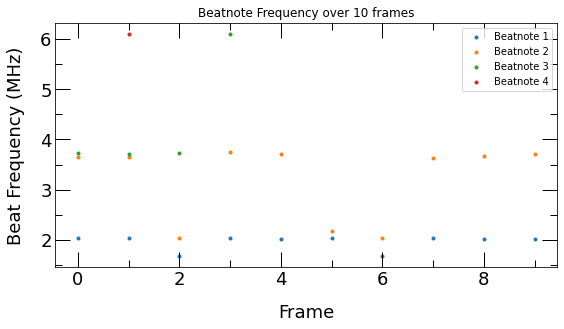

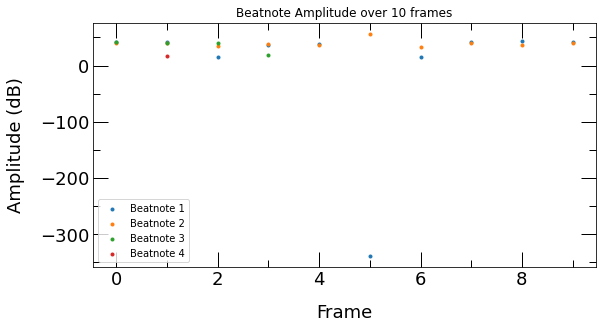

AttributeError: 'BeatnotePipeline' object has no attribute 'widths_mhz'

In [7]:
beat.plot_timelines(fit_params, variable_type=None)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[[41.22579252112484, 41.22579252112484, 15.277187766391657, 36.45845418549618, 39.055016700658584, -339.3402852975958, 16.016653359093116, 42.42507715255367, 43.76148962427557, 42.29114371868323], [40.491669590542706, 40.491669590542706, 35.33508588738352, 38.01402019314812, 36.59361415927764, 56.579854742364425, 33.236344371550814, 40.13225510847444, 37.00510053093305, 40.31586803818401], [41.55365794818151, 39.67732082079807, 39.64219842985223, 18.70769998797593, nan, nan, nan, nan, nan, nan], [nan, 16.619288608187112, nan, nan, nan, nan, nan, nan, nan, nan]]


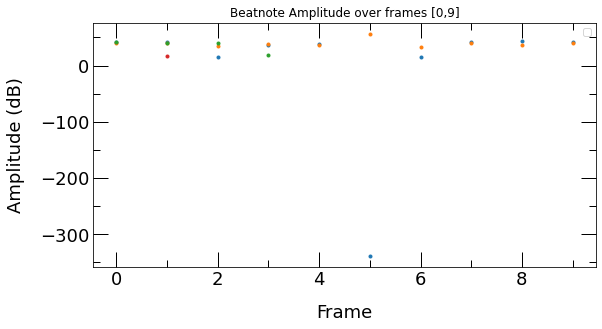

In [32]:
print(amplitudes)

tools.xy_plot( [frames, amplitudes], type='beat_timeline', aspect = 0.5, yerror = None, x_label = 'Frame', y_label = 'Amplitude (dB)', title = 'Beatnote Amplitude over frames [{},{}]'.format(min(frames), max(frames)), box = False, save = True, target_dir = target_dir)

[[2032279.97, 2032279.97, 1677513.12, 2032279.97, 2028465.27, 2032279.97, 1679420.47, 2030372.62, 2028465.27, 2028465.27], [3651618.96, 3651618.96, 2030372.62, 3743171.69, 3712654.11, 2173423.77, 2034187.32, 3621101.38, 3666877.75, 3714561.46], [3737449.65, 3701210.02, 3727912.9, 6096839.9, nan, nan, nan, nan, nan, nan], [nan, 6100654.6, nan, nan, nan, nan, nan, nan, nan, nan]]
4
Standard deviation =  0.4833904630513703  MHz


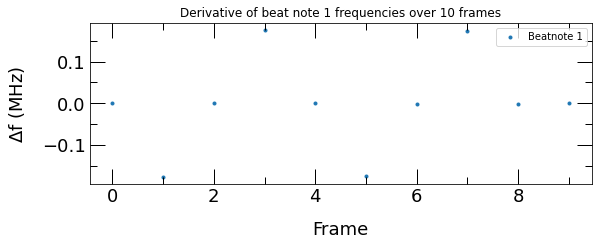

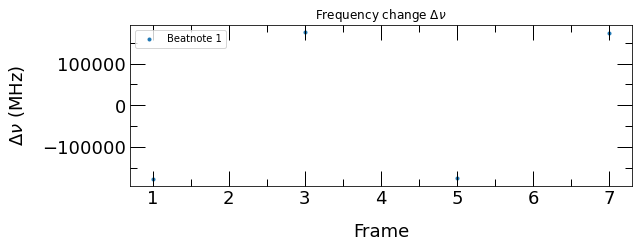

[1, 3, 5, 7] [-177383.42499999993, 175476.07499999995, -174522.40000000002, 174522.40000000002]


In [8]:

selected_times, selected_beats = select_higher_beatnotes(frames, frequencies, beatnote_index=1, sigma =0.1, target_dir=target_dir)

print(selected_times, selected_beats)
#beat.get_beatnote_stats(frames, frequencies, sigma = 2, n_bins = 30)

4
Standard deviation =  0.4833904630513703  MHz


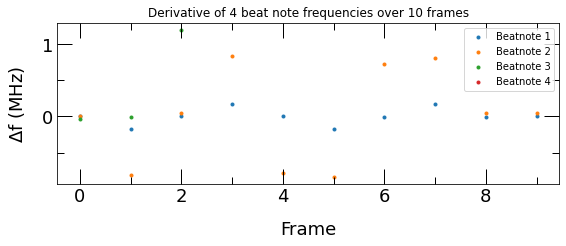

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


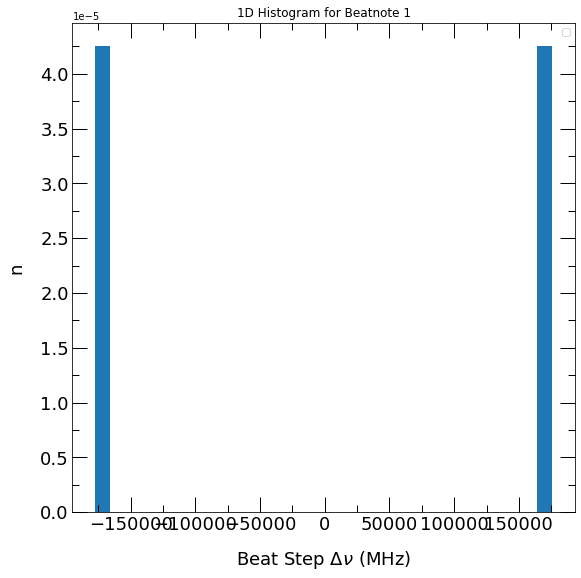

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


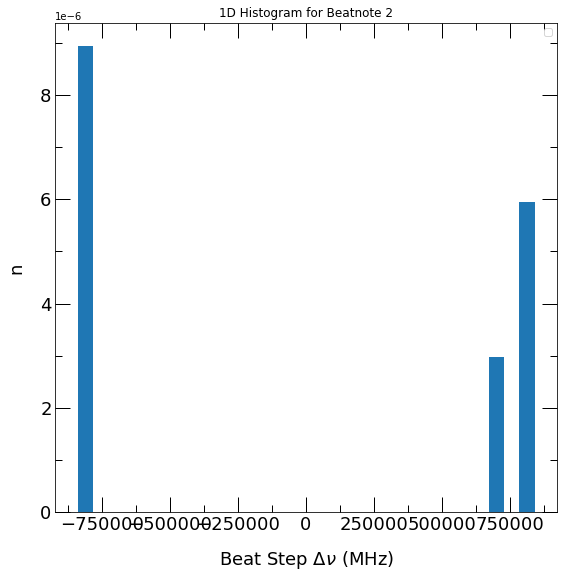

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


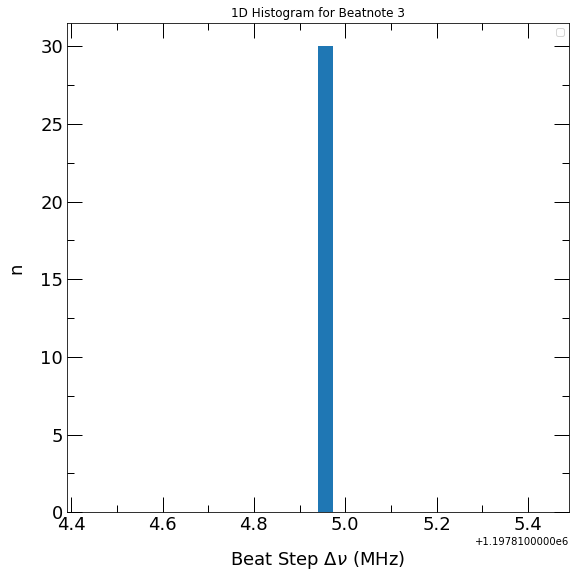

/Users/sabrinaperrenoud/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


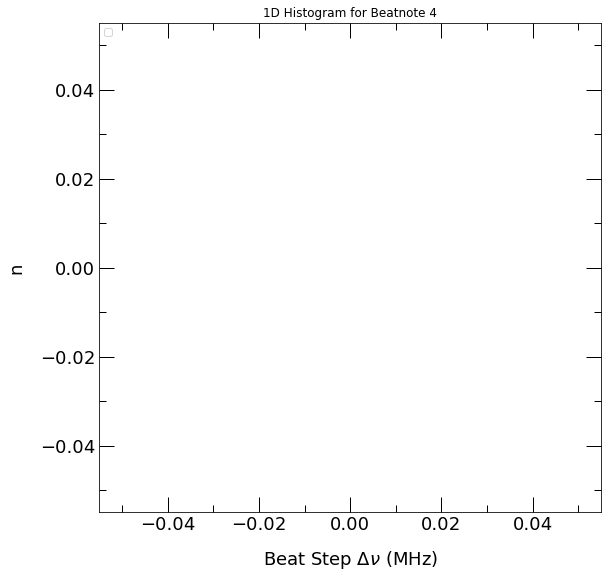

In [6]:
beat.get_beatnote_stats(frames, frequencies, beatnote_index=None, sigma = 0.1, n_bins = 30)